In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_telco_data
from prepare import chop_data,prep_telco,keep_cust_prep_telco,charts_telco
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_text, plot_tree

this file exists, reading csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import KNeighborsClassifier

In [3]:
get_telco_data.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
show = prep_telco(get_telco_data)

In [53]:
chart_tested_telco['security_backup'] = ((chart_tested_telco['online_security'] == 'Yes') | (chart_tested_telco['online_backup'] == 'Yes')).astype(int)

In [54]:
chart_tested_telco['streaming_service'] = ((chart_tested_telco['streaming_tv'] == 'Yes') | (chart_tested_telco['streaming_movies'] == 'Yes')).astype(int)

In [64]:
chart_tested_telco['protection_services'] = ((chart_tested_telco['device_protection'] == 'Yes') | (chart_tested_telco['tech_support'] == 'Yes')).astype(int)

In [55]:
chart_tested_telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,security_backup,streaming_service
4930,1,1,1,0,48,1,No,No,Yes,No,...,Yes,1,58.95,2789.70,No,One year,DSL,Bank transfer (automatic),1,1
117,1,0,1,1,46,1,No,No internet service,No internet service,No internet service,...,No internet service,1,19.25,864.20,No,Two year,No internet service,Mailed check,0,0
5275,0,0,0,0,1,1,Yes,No,No,No,...,No,1,49.80,49.80,No,Month-to-month,DSL,Credit card (automatic),0,0
6364,1,0,0,0,55,1,No,No,Yes,Yes,...,Yes,1,64.75,3617.10,No,Two year,DSL,Mailed check,1,1
1092,0,1,1,0,51,1,Yes,Yes,No,Yes,...,Yes,1,93.65,4839.15,No,One year,Fiber optic,Bank transfer (automatic),1,1


In [62]:
chart_tested_telco = chart_tested_telco.drop(columns=["streaming_tv","streaming_movies","online_backup","online_security"])

In [69]:
chart_tested_telco = chart_tested_telco.drop(columns=["device_protection","tech_support"]

In [100]:
chart_tested_telco.dtypes

gender                     int64
senior_citizen             int64
partner                    int64
dependents                 int64
tenure                     int64
phone_service              int64
multiple_lines             int64
paperless_billing          int64
monthly_charges          float64
total_charges            float64
churn                     object
contract_type             object
internet_service_type    float64
payment_type              object
security_backup            int64
streaming_service          int64
protection_services        int64
dtype: object

In [5]:
charts = charts_telco(get_telco_data)

In [76]:
#show.dtypes

In [104]:
chart_tested_telco.internet_service_type.unique() # change into yes,no

array([nan])

In [103]:
chart_tested_telco.internet_service_type = chart_tested_telco.internet_service_type.map({'No phone service': 0, 'No': 0, 'Yes': 1})

In [88]:
chart_tested_telco.multiple_lines = chart_tested_telco.multiple_lines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

In [97]:
chart_tested_telco.multiple_lines.value_counts() #change into yes,no

multiple_lines
0    813
1    596
Name: count, dtype: int64

In [78]:
chart_tested_telco.payment_type.value_counts() #Break into two columns, check and automatic

payment_type
Electronic check             494
Mailed check                 324
Bank transfer (automatic)    299
Credit card (automatic)      292
Name: count, dtype: int64

In [80]:
chart_tested_telco.contract_type.value_counts()

contract_type
Month-to-month    774
Two year          340
One year          295
Name: count, dtype: int64

In [82]:
features = ['senior_citizen']
X_train[features].head()

,senior_citizen
2865,1
4107,1
3453,1
923,0
2370,0


In [83]:
#make it
lr = LogisticRegression()

#fit it
lr.fit(X_train[features], y_train)

LogisticRegression()

In [84]:
lr.score(X_train[features], y_train)

0.7346745562130178

In [ ]:
chart_tested_telco.contract_type.value_counts()

In [ ]:
charts.dtypes

In [ ]:
get_telco_data.set_index("customer_id")

In [ ]:
show.isna().sum()

In [ ]:
#show["gender"] = show.gender.map({"Male":0,"Female":1}).astype(int)

In [ ]:
show.head()

In [7]:
trained_telco,validated_telco,tested_telco = chop_data(show,"churn")

In [8]:
chart_trained_telco,chart_validated_telco,chart_tested_telco = chop_data(charts,"churn")

In [9]:
trained_telco.shape

(4225, 20)

In [ ]:
# looking at the null values:
trained_telco.isna().sum()

In [ ]:
#trained_telco.fillna()

In [ ]:
trained_telco.head()

In [10]:
for column in trained_telco.columns: # Tells nulls in data
     print(f"Null values in column '{column}': {trained_telco[column].isna().sum()}")


Null values in column 'gender': 0
Null values in column 'senior_citizen': 0
Null values in column 'partner': 0
Null values in column 'dependents': 0
Null values in column 'tenure': 0
Null values in column 'phone_service': 0
Null values in column 'multiple_lines': 0
Null values in column 'online_security': 0
Null values in column 'online_backup': 0
Null values in column 'device_protection': 0
Null values in column 'tech_support': 0
Null values in column 'streaming_tv': 0
Null values in column 'streaming_movies': 0
Null values in column 'paperless_billing': 0
Null values in column 'monthly_charges': 0
Null values in column 'total_charges': 0
Null values in column 'churn': 0
Null values in column 'contract_type': 0
Null values in column 'internet_service_type': 0
Null values in column 'payment_type': 0


In [11]:
for column in trained_telco.columns: #Gives an idea categorical or continuous
     print(f"These are the values in this column '{column}': {trained_telco[column].unique()}")

These are the values in this column 'gender': [1 0]
These are the values in this column 'senior_citizen': [1 0]
These are the values in this column 'partner': [1 0]
These are the values in this column 'dependents': [0 1]
These are the values in this column 'tenure': [38  2 11 10 43 44  1  4 48 55  3 18 33  7 67 13 47 51 16 22 37 54 31 66
 45 23 25 12 34 58 57 50 14 71 15 26 60 20  9 40 17  8 72 65 29 49 63 32
 28 24 35 56 36 46  6 42 53 69 52 30  5 70 39 21 68 64 62 19 27 59  0 61
 41]
These are the values in this column 'phone_service': [1 0]
These are the values in this column 'multiple_lines': ['Yes' 'No' 'No phone service']
These are the values in this column 'online_security': ['Yes' 'No' 'No internet service']
These are the values in this column 'online_backup': ['Yes' 'No' 'No internet service']
These are the values in this column 'device_protection': ['No' 'No internet service' 'Yes']
These are the values in this column 'tech_support': ['No' 'No internet service' 'Yes']
These a

In [ ]:
#pd.get_dummies(trained_telco.internet_service_type).astype(int) #.isnull() #ONEHOT

In [ ]:
#trained_telco[['is_queenstown', 'is_southampton']] = pd.get_dummies(trained_telco.internet_service_type).astype(int)

In [12]:
validated_telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
328,0,0,1,1,11,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,19.65,225.75,0,Two year,No internet service,Mailed check
5983,0,0,1,1,26,1,Yes,No,No,No,No,Yes,No,1,83.75,2070.60,1,Month-to-month,Fiber optic,Electronic check
5551,1,0,1,1,6,0,No phone service,No,Yes,Yes,Yes,No,No,0,40.55,217.50,0,Two year,DSL,Mailed check
6614,0,0,0,0,3,1,No,No,Yes,No,No,No,No,0,74.45,221.10,0,Month-to-month,Fiber optic,Credit card (automatic)
6283,1,0,0,0,1,1,No,Yes,No,No,No,No,No,0,49.55,49.55,0,Month-to-month,DSL,Bank transfer (automatic)


In [ ]:
#validated_telco.internet_service_type = validated_telco.internet_service_type.fillna("No internet service")

In [ ]:
#show["internet_service_type"] = show.internet_service_type.map({"DSL":0,"Fiber Optic":1}).astype(int)

In [ ]:
#show["dependents"] = show.dependents.map({"No":0,"Yes":1}).astype(int)

In [ ]:
#show["multiple_lines"] = show.multiple_lines.map({"No":0,"Yes":1}).astype(int)

In [ ]:
#show.fillna

In [ ]:
#show["paperless_billing"] = show.paperless_billing.map({"No":0,"Yes":1}).astype(int)

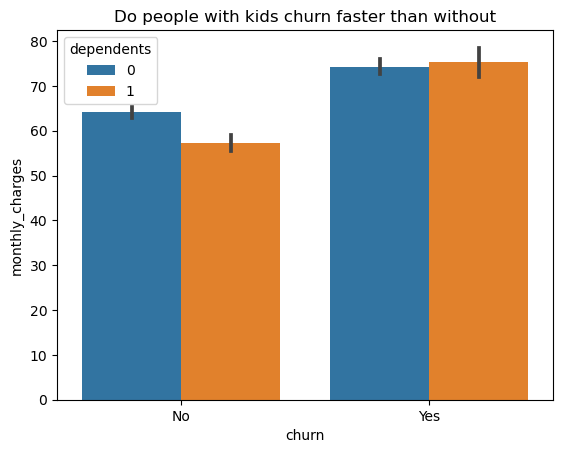

In [13]:

plt.title("Do people with kids churn faster than without")
sns.barplot(y="monthly_charges", x="churn", data=chart_trained_telco, hue="dependents")
# churn_rate = trained_telco.churn.mean()
# plt.axhline(churn_rate)
plt.show()

In [14]:
with_kids__churn_rate = pd.crosstab(columns=trained_telco.dependents,index=trained_telco.churn)

In [15]:
with_kids__churn_rate

dependents,0,1
churn,,
0,2042,1062
1,919,202


In [16]:
chi2, p, degf, expected = stats.chi2_contingency(with_kids__churn_rate)

In [17]:
p # reject null

4.91325418673439e-24

In [18]:
classy = DecisionTreeClassifier

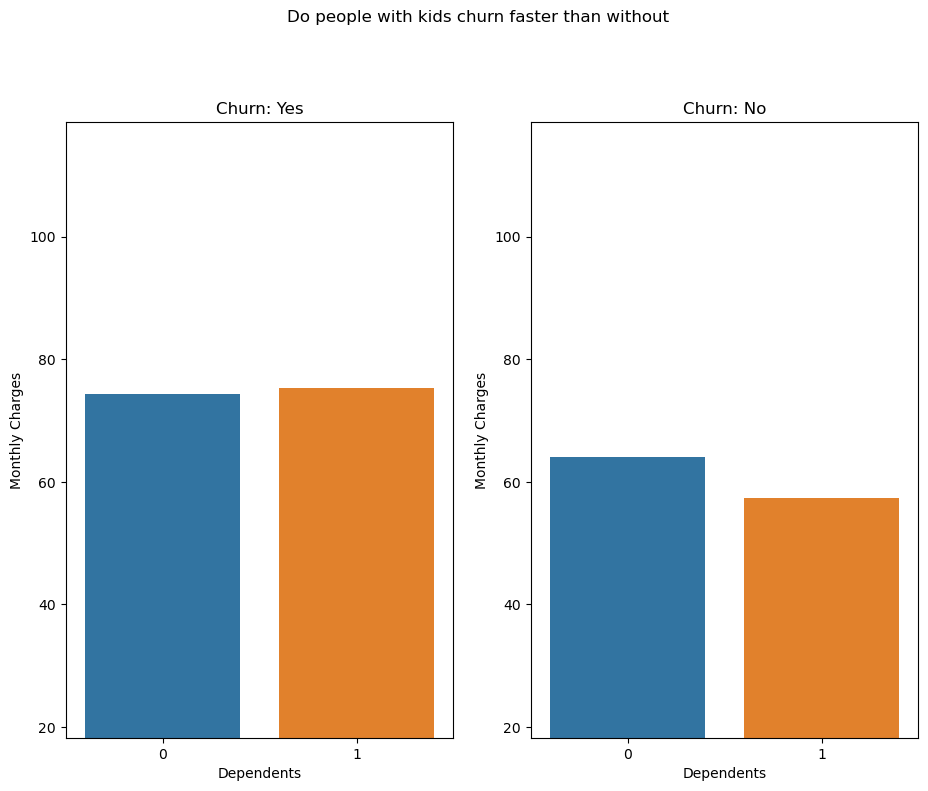

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Assuming you have your own DataFrame named chart_trained_telco
# # Replace ... with the actual variable holding your DataFrame
# chart_trained_telco = chart_trained_telco

# # Check if the required columns are present in the DataFrame
# required_columns = ['dependents', 'monthly_charges', 'churn']
# if not all(column in chart_trained_telco.columns for column in required_columns):
#     raise ValueError("Ensure that your DataFrame has the required columns: 'dependents', 'monthly_charges', 'churn'.")

# # Check if values in the 'churn' column are valid
# valid_churn_values = {'Yes', 'No'}
# if not set(chart_trained_telco['churn']).issubset(valid_churn_values):
#     raise ValueError("Values in the 'churn' column should be either 'Yes' or 'No'.")

# Calculate a common range for 'monthly_charges'
common_monthly_charges_range = chart_trained_telco['monthly_charges'].min(), chart_trained_telco['monthly_charges'].max()

# Plotting separate bar plots for "Yes" and "No" churn values
plt.figure(figsize=(11, 8))

plt.subplot(1, 2, 1)
sns.barplot(x="dependents", y="monthly_charges", data=chart_trained_telco[chart_trained_telco['churn'] == 'Yes'], ci=None)
plt.title("Churn: Yes")
plt.xlabel("Dependents")
plt.ylabel("Monthly Charges")
plt.ylim(common_monthly_charges_range)  # Set y-axis limit to common range

plt.subplot(1, 2, 2)
sns.barplot(x="dependents", y="monthly_charges", data=chart_trained_telco[chart_trained_telco['churn'] == 'No'], ci=None)
plt.title("Churn: No")
plt.xlabel("Dependents")
plt.ylabel("Monthly Charges")
plt.ylim(common_monthly_charges_range)  # Set y-axis limit to common range

plt.suptitle("Do people with kids churn faster than without", y=1.02)
#plt.tight_layout()
plt.show()


In [38]:
classy.fit(X_train,y_train)

AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [ ]:


# Check if the required columns are present in the DataFrame
required_columns = ['dependents', 'monthly_charges', 'churn']
if not all(column in chart_trained_telco.columns for column in required_columns):
    raise ValueError("Ensure that your DataFrame has the required columns: 'dependents', 'monthly_charges', 'churn'.")

# Check if values in the 'churn' column are valid
valid_churn_values = {'Yes', 'No'}
if not set(chart_trained_telco['churn']).issubset(valid_churn_values):
    raise ValueError("Values in the 'churn' column should be either 'Yes' or 'No'.")

# Plotting separate bar plots for "Yes" and "No" churn values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="dependents", y="monthly_charges", data=chart_trained_telco[chart_trained_telco['churn'] == 'Yes'])
plt.title("Churn: Yes")
plt.xlabel("Dependents")
plt.ylabel("Monthly Charges")

plt.subplot(1, 2, 2)
sns.barplot(x="dependents", y="monthly_charges", data=chart_trained_telco[chart_trained_telco['churn'] == 'No'])
plt.title("Churn: No")
plt.xlabel("Dependents")
plt.ylabel("Monthly Charges")

plt.suptitle("Do people with kids churn faster than without", y=1.02)
plt.tight_layout()
plt.show()


Does being a senior citizen affect churn rate as monthyly charges increase?

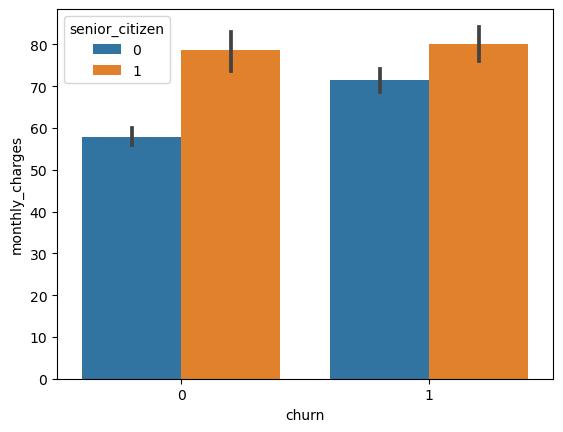

In [19]:
sns.barplot(data=validated_telco, y="monthly_charges", x='churn',hue="senior_citizen")
plt.show()

In [24]:
senior_churn_rate = pd.crosstab(columns=trained_telco.senior_citizen,index=trained_telco.churn)

In [25]:
chi2, p, degf, expected = stats.chi2_contingency(senior_churn_rate)

In [26]:
p

1.5271938515844278e-21

f p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:

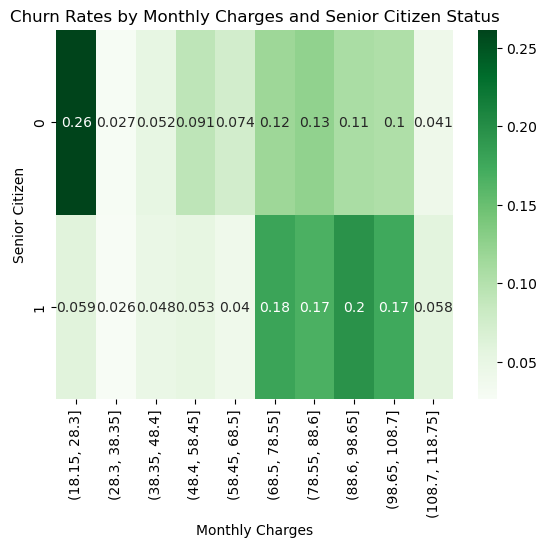

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called trained_telco
sns.heatmap(pd.crosstab(trained_telco['senior_citizen'], pd.cut(trained_telco['monthly_charges'], bins=10), normalize='index'), annot=True, cmap='Greens')

plt.title('Churn Rates by Monthly Charges and Senior Citizen Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Senior Citizen')
plt.show()


In [46]:
y_train = trained_telco.churn

In [47]:
y_train.mode()#BASELINE

0    0
Name: churn, dtype: int64

In [48]:
(y_train == 0).mean()

0.7346745562130178

In [ ]:
y_train.value_counts(normalize=True)[0]#BASELINE ACCURACY

In [ ]:
trained_telco.churn.unique()

In [32]:
X_train = trained_telco.drop(columns="churn") 

In [33]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type
2865,1,1,1,0,38,1,Yes,Yes,Yes,No,No,No,Yes,0,95.00,3591.25,One year,Fiber optic,Credit card (automatic)
4107,1,1,0,0,2,1,No,No,No,No,No,No,No,1,70.35,139.05,Month-to-month,Fiber optic,Electronic check
3453,0,1,1,0,11,1,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,19.95,214.75,Month-to-month,No internet service,Mailed check
923,0,0,0,0,10,1,Yes,No,No,No,No,Yes,No,1,86.05,834.10,Month-to-month,Fiber optic,Bank transfer (automatic)
2370,0,0,0,0,43,1,No,No,Yes,No,No,No,Yes,1,60.00,2548.55,Two year,DSL,Electronic check


In [40]:
classy = DecisionTreeClassifier()

In [43]:
neeb = KNeighborsClassifier()

In [71]:
neeb.fit(X_train,y_train)

ValueError: could not convert string to float: 'Yes'

In [72]:
classy.fit(X_train,y_train)

ValueError: could not convert string to float: 'Yes'

In [ ]:
# sns.boxplot(data=validated_telco, x='monthly_charges', y='churn')
# plt.show()

In [ ]:
# color_map = {"Yes": "green", "No": "red", "No internet service": "yellow"}

# grouped_data = trained_telco.groupby(['churn', 'online_security']).size().unstack()
# grouped_data.plot(kind='bar', color=[color_map.get(col, col) for col in grouped_data.columns])

# # Adding labels and title for better readability
# plt.title('Churn w.r.t Online Security')
# plt.xlabel('Churn')
# plt.ylabel('Count')

# # Show the plot
plt.show()

In [ ]:
show.multiple_lines.value_counts()

In [ ]:
show["online_backup"] = show.online_backup.map({"No":0,"Yes":1}).astype(int)

In [ ]:
show.online_backup.value_counts()

In [ ]:
show.online_security.value_counts()

In [ ]:
show.internet_service_type.value_counts()

In [ ]:
show.internet_service_type.count()

In [ ]:
show["internet_service_type"] = show.internet_service_type.map({"Fiber optic":1,"DSL":0}).astype(int)

In [ ]:
len(show.isnull().sum() > 0) #null look at

In [ ]:
show.internet_service_type.isnull().sum()

In [ ]:
show.internet_service_type.info()

In [ ]:
show.internet_service_type.describe()

In [ ]:
#show["phone_service"] = show.phone_service.map({"No":0,"Yes":1}).astype(int)

In [ ]:
#show["partner"] = show.partner.map({"No":0,"Yes":1}).astype(int)

In [ ]:
show.internet_service_type.value_counts()

In [ ]:
show.internet_service_type.unique() #show NAN

In [ ]:
show.phone_service.unique()

In [ ]:
show.payment_type.value_counts()

In [ ]:
show.internet_service_type.isnull().sum()

In [ ]:
Fixer = SimpleImputer(missing_values = None, strategy='most_frequent')

In [ ]:
Fixer.fit(show["internet_service_type"])

In [ ]:
show.internet_service_type.isnull().value_counts()

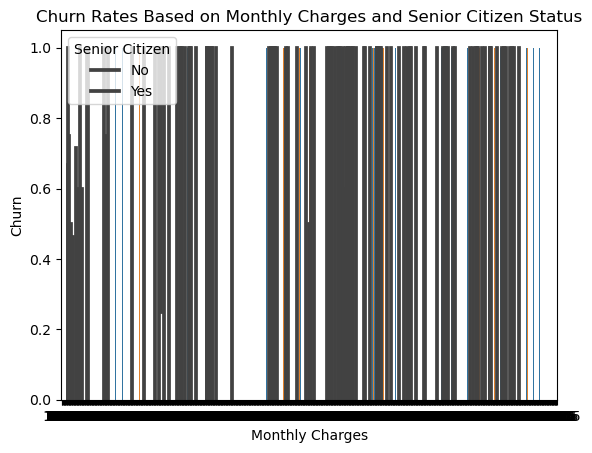

In [37]:
# import seaborn as sns
# import matplotlib.pyplot as plt


# sns.barplot(data=validated_telco, x="monthly_charges", y='churn', hue="senior_citizen")

# # Modify the legend labels
# plt.legend(title='Senior Citizen', labels=['No', 'Yes'])

# plt.title('Churn Rates Based on Monthly Charges and Senior Citizen Status')
# plt.xlabel('Monthly Charges')
# plt.ylabel('Churn')

# plt.show()